# Exercicio 2:   

# Bibliotecas a Utilizar:

## 1) `networkx`:
- Biblioteca que auxilia na criação e manipulação de grafos, oferecendo uma interface simples para trabalhar com grafos orientados e não orientados.
- Neste trabalho, vamos trabalhar com **grafos orientados** e verificar se são **fortemente conectados**. Com a utilização desta biblioteca, conseguiremos manipular as **arestas** e **nós** do grafo.

## 2) `ortools`:
- A biblioteca `ortools` é uma ferramenta que permite resolver problemas de **programação linear**, **programação inteira** e problemas de **otimização com restrições** utilizando diferentes tipos de **solvers**.
- Vamos utilizá-la neste trabalho para resolver o problema de **remoção de arestas**, garantindo que o grafo permaneça **fortemente conexo**. O `ortools` será responsável por maximizar o número de arestas que podem ser removidas, mantendo as restrições de conectividade.

## 3) `random`:
- A biblioteca `random` é uma biblioteca do Python que fornece funções para a **geração de números aleatórios** e **amostras aleatórias**.
- Vamos utilizá-la para gerar **descendentes aleatórios** de nós no grafo. Isso significa que a criação das arestas entre os nós será feita de maneira aleatória, respeitando os limites definidos.


In [23]:
import networkx as nx
from ortools.linear_solver import pywraplp
import random 

### Alínea a)

- Vamos gerar um grafo orientado ligado aleatório com `N` (número de nodos) variando entre 6 e 10, onde cada nodo possui entre 1 a 3 descendentes, **sem loops** ou destinos repetidos.
- O grafo deve ser **fortemente conexo**, ou seja, para cada par de nós **`<n1, n2>`**, deve existir um caminho de `n1` para `n2` e outro caminho de `n2` para `n1`.


In [9]:
### Completar
N = random.randint(6,10)

def geraGrafo(N): 
    while True: 
        G = nx.DiGraph()
        G.add_nodes_from(range(N))

        for node in range(N):
            desc = random.randint(1,3)
            dest = random.sample([n for n in range(N) if n != node], desc)
            G.add_edges_from((node, dest) for dest in dest)

        if nx.is_strongly_connected(G):
            return G

grafo = geraGrafo(N)



### Descrição do Bloco de Código

Neste bloco de código, definimos a variável `N`, que representa o número máximo de nodos, sendo um valor aleatório entre 6 e 10, gerado com o auxílio da biblioteca *random*. A seguir, construímos uma função para gerar grafos de acordo com o valor de `N` previamente definido.

A condição **`while True:`** garante que os grafos gerados sejam sempre **orientados e fortemente conectados**. Sem essa condição, precisaríamos de uma abordagem mais controlada, ou seja, seria necessário definir um número máximo de tentativas para gerar um grafo orientado e conectado, evitando um loop infinito caso a geração falhe repetidamente.

A função `gera_grafo` cria inicialmente um grafo `G` vazio e, em seguida, adiciona um número de nós, definido aleatoriamente pela variável `N`. O laço `for` subsequente adiciona as arestas ao grafo de acordo com as restrições dos descendentes. Finalmente, o **`if statement`** utiliza a função **`is_strongly_connected`** da biblioteca *NetworkX*, que verifica se o grafo é fortemente conexo. Se for, o grafo é retornado; caso contrário, o processo continua até gerar um grafo válido.


In [ ]:
for w,r in grafo.edges():
    print(f"{w} -> {r}")

Este bloco de código é apenas um loop para gerar as arestas do grafo

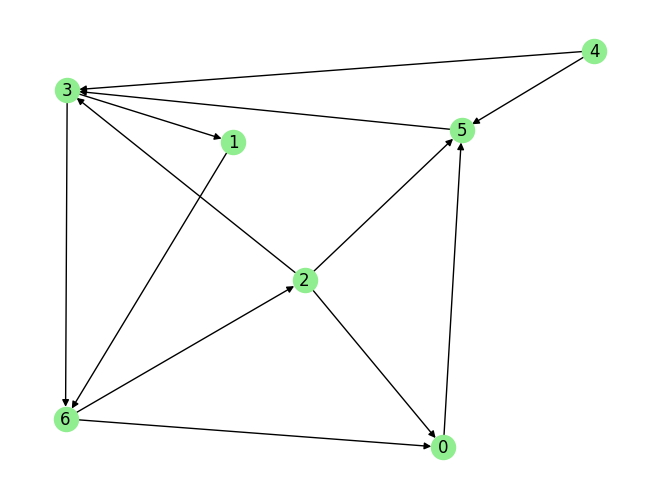

In [42]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def geraGrafo(N):
    G = nx.DiGraph()
    G.add_nodes_from(range(N))

    for node in range(N):
        desc = random.randint(1, 3)
        dests = random.sample([n for n in range(N) if n != node], desc)
        for dest in dests:
            if not G.has_edge(dest, node):
                G.add_edge(node, dest)

    return G

N = random.randint(6, 10)
grafo = geraGrafo(N)

nx.draw(grafo, with_labels=True, node_color='lightgreen', arrows=True)
plt.show()

### Alinea b)
1) **_Objétivo_:**

- O problema dado consiste na determinação do maior número de arestas que podem ser removidas de um grafo orientado ligado, que se mantém ligado.

2) **_Descrição do problema_:**
    - **Sistema de Tráfego:** Um grafo orientado ligado que os seus nodos representam pontos de acesso e arestas que representam vias de comunicação unidirecionais.
    - **Condições:** 
        - O grafo tem que ser ligado, ou sjea, deve existir sempre um caminho entre cada par de nodos em ambas direções.
        - Ao remover arestas o grafo tem que se manter ligado caso contrário não remove.

3) **_Estrutura da resolução_:**
    - Utilização da biblioteca _networkx_ para a criação de um grafo orientado ligado;
    - Implementação de uma quantidade de nodos aleatória com arestas para garantir a conectividade;

4) **_Remoção de Arestas_:**
    - Implementação de uma função para remover arestas de forma aleatória;
    - Verificar se o grafo continua orientado ligado com as remoções das arestas;
    - Caso a/as aresta/as removida/as causar que o grafo fique não orientado ligado temos que voltar a adicionar a/as aresta/as; 

Maior número de arestas removíveis: 1
Arestas que podem ser removidas: [(4, 5)]


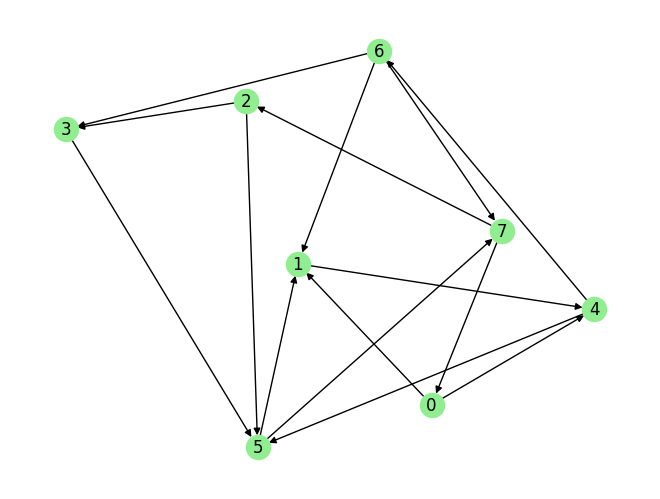

Maior número de arestas removíveis: 0
Arestas que podem ser removidas: []


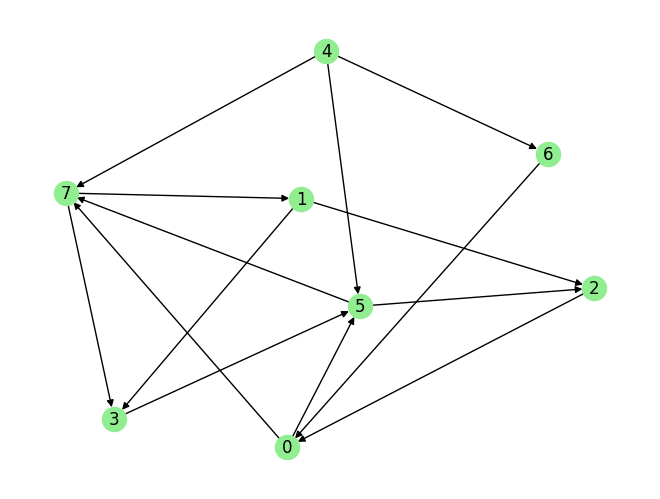

In [82]:
import networkx as nx
from ortools.linear_solver import pywraplp
import random


def geraGrafo(N):
    grafo = nx.DiGraph()
    grafo.add_nodes_from(range(N))

    for node in range(N):
        desc = random.randint(1, 3)
        dests = random.sample([n for n in range(N) if n != node], desc)
        for dest in dests:
            if not grafo.has_edge(dest, node):
                grafo.add_edge(node, dest)
    
    return grafo  

        
def maximo_de_arestas_remov_simples(grafo):
    grafo_copy = grafo.copy()  
    arestas_removidas = []

    while True:
        if len(grafo_copy.edges()) == 0:
            break

        
        aresta = random.choice(list(grafo_copy.edges()))
        grafo_copy.remove_edge(*aresta)

        
        if not nx.is_strongly_connected(grafo_copy):
            grafo_copy.add_edge(*aresta)  
            break

        arestas_removidas.append(aresta)

    return len(arestas_removidas), arestas_removidas

N = random.randint(6, 10)

grafo = geraGrafo(N)

arestas_removidas, lista_arestas_removidas = maximo_de_arestas_remov_simples(grafo)
print(f"Maior número de arestas removíveis: {arestas_removidas}")
print(f"Arestas que podem ser removidas: {lista_arestas_removidas}")
nx.draw(grafo, with_labels=True, node_color='lightgreen', arrows=True)
plt.show()

grafo = geraGrafo(N)

arestas_removidas, lista_arestas_removidas = maximo_de_arestas_remov_simples(grafo)
print(f"Maior número de arestas removíveis: {arestas_removidas}")
print(f"Arestas que podem ser removidas: {lista_arestas_removidas}")
nx.draw(grafo, with_labels=True, node_color='lightgreen', arrows=True)
plt.show()
